In [1]:
import pandas as pd
import numpy as np

In [2]:
# import the data spreadsheet
csv_loc = 'drive/MyDrive/Datasets/AmazonReviews/Reviews.csv'
df = pd.read_csv(csv_loc)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# look at columns
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [3]:
# create new column with helpfulness% = helpnum/helpdenom
# np.where(if..., replace element with: , else replace with:)
# name the new column "helpful%"
df['Helpful%'] = np.where(df['HelpfulnessDenominator']>0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [ ]:
df['Helpful%'].unique()

In [4]:
# split Helpful% into discrete categories
# pd.cut(which column, which bins, labels for each bin)
# store in new column '%upvote'
df['%Upvote'] = pd.cut(df['Helpful%'], bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Empty', '0-19%', '20-39%', '40-59%', '60-79%', '80-100%'])

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [5]:
# tally up for each caterogy for score and %upvote using .agg('count')
df.groupby(['Score', '%Upvote']).agg('count')

Id  ProductId  UserId  ...  Summary    Text  Helpful%
Score %Upvote                             ...                           
1     Empty      8060       8060    8060  ...     8060    8060      8060
      0-19%      2338       2338    2338  ...     2338    2338      2338
      20-39%     4649       4649    4649  ...     4649    4649      4649
      40-59%     6586       6586    6586  ...     6586    6586      6586
      60-79%     5838       5838    5838  ...     5838    5838      5838
      80-100%   12531      12531   12531  ...    12531   12531     12531
2     Empty      4234       4234    4234  ...     4234    4234      4234
      0-19%       762        762     762  ...      737     762       762
      20-39%     1618       1618    1618  ...     1618    1618      1618
      40-59%     3051       3051    3051  ...     3051    3051      3051
      60-79%     2486       2486    2486  ...     2486    2486      2486
      80-100%    7014       7014    7014  ...     7014    7014      7014
3     Empty      5062       5062    5062  ...     5062    5062      5062
      0-19%       474        474     474  ...      474     474       474
      20-39%     1506       1506    1506  ...     1506    1506      1506
      40-59%     3384       3384    3384  ...     3384    3384      3384
      60-79%     2754       2754    2754  ...     2754    2754      2754
      80-100%   11037      11037   11037  ...    11036   11037     11037
4     Empty      4780       4780    4780  ...     4780    4780      4780
      0-19%       116        116     116  ...      116     116       116
      20-39%      909        909     909  ...      909     909       909
      40-59%     3185       3185    3185  ...     3185    3185      3185
      60-79%     2941       2941    2941  ...     2941    2941      2941
      80-100%   26707      26707   26707  ...    26707   26707     26707
5     Empty     11638      11638   11638  ...    11638   11638     11638
      0-19%       432        432     432  ...      432     432       432
      20-39%     2275       2275    2275  ...     2275    2275      2275
      40-59%    10312      10312   10312  ...    10312   10312     10312
      60-79%    11060      11060   11060  ...    11060   11060     11060
      80-100%  140661     140661  140661  ...   140661  140661    140661

[30 rows x 10 columns]

In [6]:
# all rows are the same so can just sort for Id column
df.groupby(['Score', '%Upvote']).agg({'Id':'count'})

Id
Score %Upvote        
1     Empty      8060
      0-19%      2338
      20-39%     4649
      40-59%     6586
      60-79%     5838
      80-100%   12531
2     Empty      4234
      0-19%       762
      20-39%     1618
      40-59%     3051
      60-79%     2486
      80-100%    7014
3     Empty      5062
      0-19%       474
      20-39%     1506
      40-59%     3384
      60-79%     2754
      80-100%   11037
4     Empty      4780
      0-19%       116
      20-39%      909
      40-59%     3185
      60-79%     2941
      80-100%   26707
5     Empty     11638
      0-19%       432
      20-39%     2275
      40-59%    10312
      60-79%    11060
      80-100%  140661

In [7]:
# reset indices on previous set so that everything is now in order
df_s = df.groupby(['Score', '%Upvote']).agg({'Id':'count'}).reset_index()
df_s.head()

,Score,%Upvote,Id
0,1,Empty,8060
1,1,0-19%,2338
2,1,20-39%,4649
3,1,40-59%,6586
4,1,60-79%,5838


In [8]:
# pivot table with index as %Upvote and column as score
pivot = df_s.pivot(index='%Upvote', columns='Score')

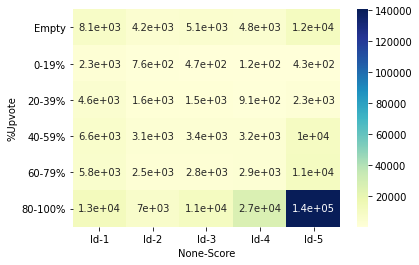

In [9]:
# create heatmap
import seaborn as sns
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
# we can see most people gave 5 stars

In [10]:
# APPLY BAG OF WORDS, ie convert text to numbers for model
# first get rid of score 3 = neutral because its of no use if we are doing classification
df2 = df[df['Score']!=3]
# store text responses in X
X = df2['Text']
# create new dictionary, convert 1,2 scores to 0, convert 4,5 scores to 1
y_dict = {1:0, 2:0, 4:1, 5:1}
# apply mapping
y = df2['Score'].map(y_dict)

In [ ]:
# convert text to vectors
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# implement exclusions using stop_words, common exclusion list is 'english'
c = CountVectorizer(stop_words='english')
# fit calculates mean and var, transform applies normalisation to data
X_c = c.fit_transform(X)

In [20]:
X_c.shape
# 114969 features

(525814, 114969)

In [ ]:
# split data into train test sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_c, y)

In [ ]:
X_train.shape

(394360, 114969)

In [ ]:
# import model
from sklearn.linear_model import LogisticRegression

In [ ]:
# fit model
log=LogisticRegression()
ml = log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# check model accuracy
ml.score(X_test,y_test)

0.9369741506534606

In [ ]:
# fetch top 20 positive and negative words
words = c.get_feature_names()

In [ ]:
# extract coefficients
coef = ml.coef_.tolist()[0]

In [ ]:
coef_df = pd.DataFrame({'Word':words, 'Coefficient':coef})

In [ ]:
coef_df

,Word,Coefficient
0,00,-0.318608
1,000,-0.004676
2,0000,0.203590
3,000001,-0.002246
4,00001,-0.008844
...,...,...
114964,çaykur,0.001097
114965,çelem,-0.117459
114966,être,0.021198
114967,île,0.000000


In [ ]:
# sort by ascending/descending coefficient
coef_df = coef_df.sort_values(['Coefficient'], ascending=False)

In [ ]:
# top 20 positive words
coef_df.head(20)

,Word,Coefficient
80600,pleasantly,3.850179
39072,downside,3.070003
5865,addicting,2.856458
94667,skeptical,2.781701
39214,drawback,2.617978
87967,resist,2.457620
113138,worries,2.443790
54130,hesitant,2.387108
96353,soothing,2.286069
35726,delish,2.249903


In [ ]:
# top 20 negative words
coef_df.tail(20)

,Word,Coefficient
23814,bummer,-2.334889
41118,embarrassed,-2.340684
89864,ruined,-2.349006
21288,blech,-2.382259
106894,unappealing,-2.411508
56229,ick,-2.441322
37563,disappointment,-2.471587
110404,vomited,-2.512949
76576,overpowers,-2.523914
35220,defeats,-2.559910


In [11]:
# AUTOMATE WITH FUNCTIONS
# 1) bag of words
# 2) check model accuracy
# 3) fetch top 20 positive words and top 20 negative words

# (indep data, dep data, nlp, ml)
def text_fit(X, y, nlp_model, ml_model, coef_show):
  # normalise
  X_c = nlp_model.fit_transform(X)
  # print features using format of X_c
  print('features:{}'.format(X_c.shape[1]))

  # split into test train set
  X_train,X_test,y_train,y_test = train_test_split(X_c,y)
  # fit ml model
  ml = ml_model.fit(X_train,y_train)
  # check accuracy
  acc = ml.score(X_test,y_test)
  print(acc)

  if coef_show==1:
    # get features and convert to list
    words = c.get_feature_names()
    coef = ml.coef_.tolist()[0]
    # convert to df
    coef_df = pd.DataFrame({'Word':words, 'Coefficient':coef})
    # sort in descending order
    coef_df = coef_df.sort_values(['Coefficient'], ascending=False)

    # print top/bottom 20 words
    print('\n')
    print('Top 20 Positive Words')
    print(coef_df.head(20))
    print('\n')
    print('Top 20 Negative Words')
    print(coef_df.tail(20))


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

c = CountVectorizer(stop_words='english')

# run model
text_fit(X, y, c, LogisticRegression(), coef_show=0)

features:114969


NameError: ignored

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

# prediction function
def predict(X, y, nlp_model, ml_model):
  # normalise data
  X_c = nlp_model.fit_transform(X)
  # split into test train
  X_train,X_test,y_train,y_test = train_test_split(X_c, y)
  # fit training set
  ml = ml_model.fit(X_train, y_train)
  
  # predict using test set
  predictions = ml.predict(X_test)
  # confusion matrix
  cm = confusion_matrix(predictions,y_test) # check against the actual labels
  print(cm)
  # calc accuracy score
  acc = accuracy_score(predictions,y_test)
  print(acc)

In [ ]:
# nlp model
c = CountVectorizer()
# ml model
lr = LogisticRegression()

# run prediction function
predict(X, y, c, lr)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[ 14971   2849]
 [  5475 108159]]
0.9366774689244907


In [ ]:
from sklearn.dummy import DummyClassifier

c = CountVectorizer()
text_fit(X, y, c, DummyClassifier(), 0)

features:115282
0.7365846607938898


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf-idf nlp vectorizer
tfidf = TfidfVectorizer(stop_words='english')
# logreg
lr = LogisticRegression()
# run fit model
text_fit(X, y, tfidf, lr, 0)

features:114969
0.9340757983781399


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predict(X, y, tfidf, lr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[ 14119   2297]
 [  6280 108758]]
0.9347528412980967


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1)
predict(X, y, tfidf, mlp)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[ 15893   3284]
 [  4780 107497]]
0.9386553471176229


In [15]:
# HANDLING DATA IMBALANCE
y.value_counts() 
# way more positive cases than negative, which causes ML model to bias towards positive 

# use RANDOM OVERSAMPLING
# install tf if not using colab
from imblearn.over_sampling import RandomOverSampler

In [21]:
os = RandomOverSampler()
X_train_res,y_train_res = os.fit_sample(X_c, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
X_train_res.shape

(887554, 114969)

In [23]:
y_train_res.shape

(887554,)

In [24]:
from collections import Counter

# check classes in data
print('Original Dataset shape {}'.format(Counter(y)))
print('Resampled Dataset shape {}'.format(Counter(y_train_res)))

Original Dataset shape Counter({1: 443777, 0: 82037})
Resampled Dataset shape Counter({1: 443777, 0: 443777})


In [28]:
# PERFORM CROSS VALIDATION USING GRIDSEARCHCV

from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression()

In [25]:
# define grid
# look at hyperparameters within ML model function and define grid with those hyperparameters you want to optimise
# e.g. try a C value from 10^-2, 10^-1....10^3
grid = {'C':10.0 ** np.arange(-2,3), 'penalty':['l1', 'l2']}

In [29]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=log_class, param_grid=grid, cv=5, n_jobs=-1, scoring='f1_macro') # perform 5 splits of the data for cv

In [30]:
# fit new classifier to new balanced dataset
clf.fit(X_train_res, y_train_res)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [31]:
# split data (should have split it before then run randomoversamp on just train??)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_c, y)

In [32]:
# try prediction
pred = clf.predict(X_test)

In [34]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(y_test,pred)

array([[ 19019,   1494],
       [  8876, 102065]])

In [35]:
accuracy_score(y_test,pred) # accuracy should be alot better than before

0.9211130889893042